In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
df = pd.read_csv(r"C:\Users\14844\Desktop\Uttam\Python Project\Mu Stocks\MU2.csv")

# Convert 'Date' to datetime format and set it as the index
stock_data = df[['Date','Close']]
stock_data = pd.DataFrame(stock_data)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
#stock_data.set_index(['Date'])
print(stock_data.head())

        Date  Close
0 2012-02-01   7.70
1 2012-02-02   7.72
2 2012-02-03   7.95
3 2012-02-06   7.73
4 2012-02-07   7.88


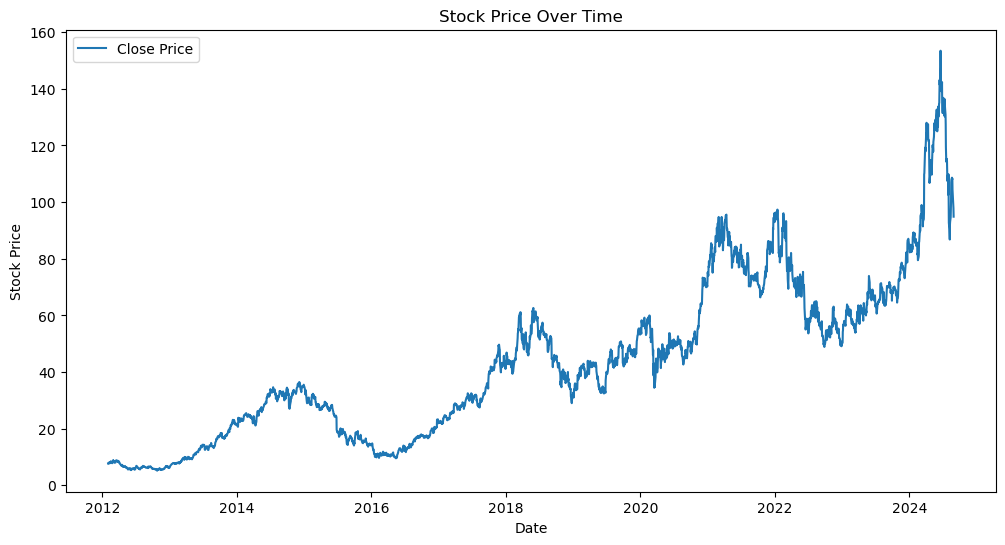

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller

def stationarity(ts):
    result = adfuller(ts, autolag='AIC')
    p = result[1]
    print(f'ADF stats: {result[0]}')
    print(f'p-value: {p}')
    print('Stationary' if p<0.05 else 'Non-Stationary')

stationarity(stock_data['Close'])

ADF stats: -1.0766394820844702
p-value: 0.7242973470253683
Non-Stationary


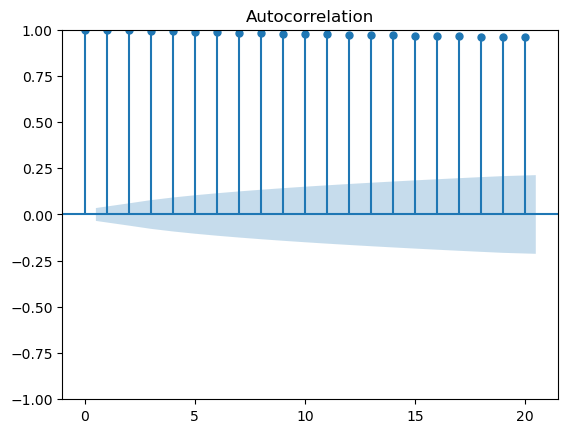

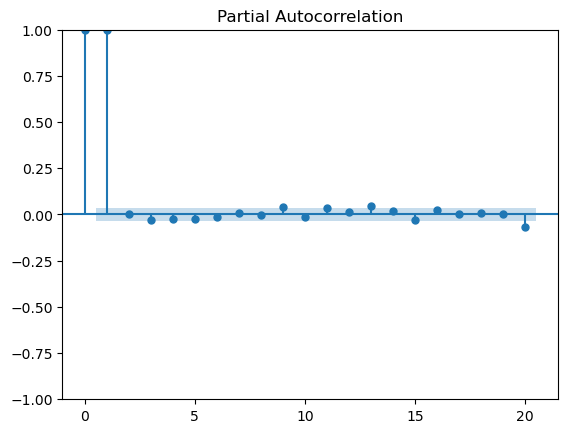

In [55]:
plot_acf(stock_data['Close'], lags = 20)
plot_pacf(stock_data['Close'], lags = 20)
plt.show()

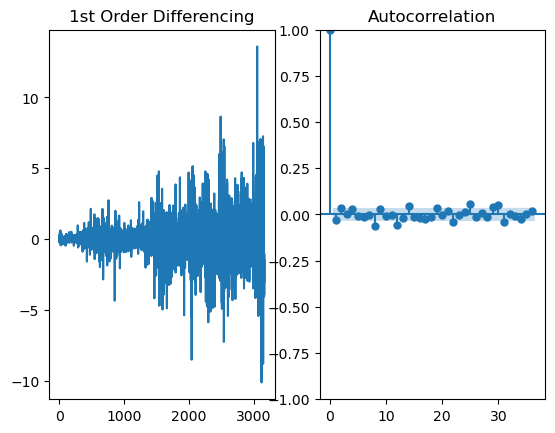

In [57]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(stock_data['Close'].diff().dropna())

ax2 = f.add_subplot(122)
plot_acf(stock_data['Close'].diff().dropna(), ax = ax2)
plt.show()

In [77]:
model = ARIMA(stock_data['Close'], order = (1,2,2))
model_fit = model.fit()
forecast = model_fit.get_forecast()

In [79]:
train_size = int(len(stock_data)*0.75)
train, test = stock_data[0:train_size], stock_data[train_size:len(stock_data)]

In [81]:
model_train = ARIMA(train['Close'], order = (1,2,2)) #changed train['Close'] to train
model_train_fit = model_train.fit()

In [83]:
steps = len(test)
test_forecast = model_train_fit.get_forecast(steps=steps)
## Align the forecast with the test index
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

In [85]:
print("NaN values in forecast series:", test_forecast_series.isna().sum())

NaN values in forecast series: 0


In [87]:
if test_forecast_series.isna().sum() == 0:
    mse = mean_squared_error(test['Close'], test_forecast_series)
    rmse = mse ** 0.5
    print(f'RMSE: {rmse}')
else:
    print("NaN values found in the forecast series, please check the data and model.")

RMSE: 22.97936160010955


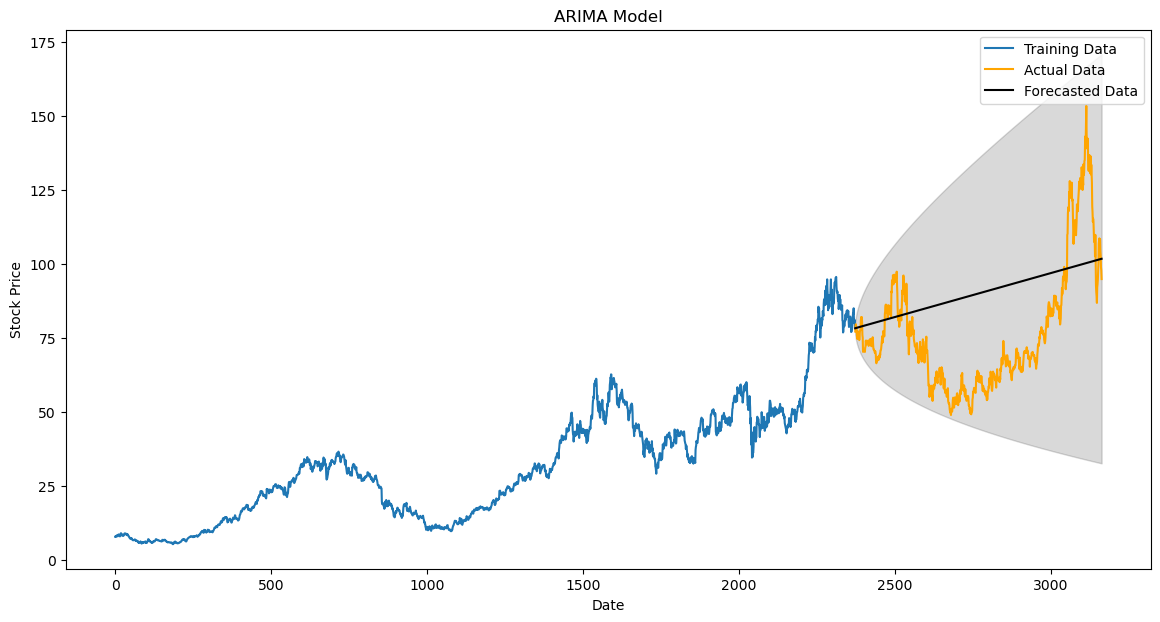

In [89]:
plt.figure(figsize=(14,7))
plt.plot(train['Close'], label = 'Training Data')
plt.plot(test['Close'], label = 'Actual Data', color='orange')
plt.plot(test_forecast_series, label= 'Forecasted Data', color = 'black')
plt.fill_between(test.index, test_forecast.conf_int().iloc[:,0], test_forecast.conf_int().iloc[:,1], color='k', alpha=0.15)
plt.title('ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()